## Clustering
Unsupervised learning models are modeling techniques in which the "correct" answer is unknown. Many of these methods involve *clustering*. The two main methods are $k$-means clustering and hierarchical clustering.  

### $k$-Means

[Visualizing $k$-means](http://shabal.in/visuals.html)  
[Visualization and explanation of $k$-means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('../data/wine.csv')
wine = wine.drop('Cultivar', axis=1)
print(wine.sample(5))

     Alcohol  Malic acid   Ash  Alcalinity of ash    Magnesium  Total phenols  \
162    12.85        3.27  2.58                 22.0        106           1.65   
7      14.06        2.15  2.61                 17.6        121           2.60   
65     12.37        1.21  2.56                 18.1         98           2.42   
61     12.64        1.36  2.02                 16.8        100           2.02   
60     12.33        1.10  2.28                 16.0        101           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
162        0.60                  0.60             0.96             5.58  0.87   
7          2.51                  0.31             1.25             5.05  1.06   
65         2.65                  0.37             2.08             4.60  1.19   
61         1.41                  0.53             0.62             5.75  0.98   
60         1.09                  0.63             0.41             3.27  1.25   

     OD280/OD315 of dilute

In [4]:
from sklearn.cluster import KMeans

# Create 3 clusters using a random seed of 42.
kmeans = KMeans(n_clusters=3, random_state=42, verbose=0).fit(wine.values)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [5]:
import numpy as np
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2]), array([62, 47, 69], dtype=int64))


In [6]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
print(kmeans_3.head())

   cluster
0        1
1        1
2        1
3        1
4        0


Since humans can only visualize in 3-dimensional space, we need to reduce the number of dimensions (in this example, 13 columns down to 3).  

#### Dimension Reduction With Principal Component Analysis (PCA)

PCA works by finding a lower dimension in the data such that the variance is maximized. 

In [7]:
from sklearn.decomposition import PCA

In [8]:
# project out data into 2 components
pca = PCA(n_components=2).fit(wine)

# transform data into the new space
pca_trans = pca.transform(wine)

# give projections a name
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

# concatenate data
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)

print(kmeans_3.sample(5))

     cluster        pca1       pca2
141        0   32.904293 -11.305366
29         1  288.008247  -8.959732
20         0   33.593594  25.567956
120        0 -121.945241  -1.588894
38         1  273.044432  -6.725074


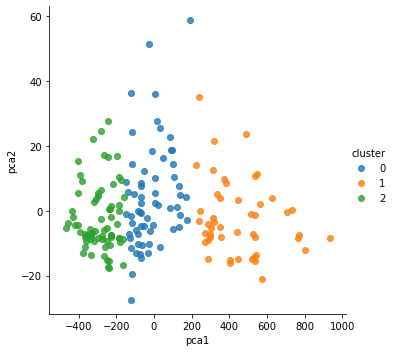

In [9]:
# Plot results
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.lmplot(x='pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False)
plt.show()

In [10]:
# Reload the wine dataset, only this time don't drop the Cultivar column.
wine_all = pd.read_csv('../data/wine.csv')

In [12]:
pca_all = PCA(n_components=2).fit(wine_all)
pca_all_trans = pca_all.transform(wine_all)
pca_all_trans_df = pd.DataFrame(pca_all_trans, columns=['pca_all_1', 'pca_all_2'])
kmeans_3 = pd.concat([kmeans_3, pca_all_trans_df, wine_all['Cultivar']], axis=1)

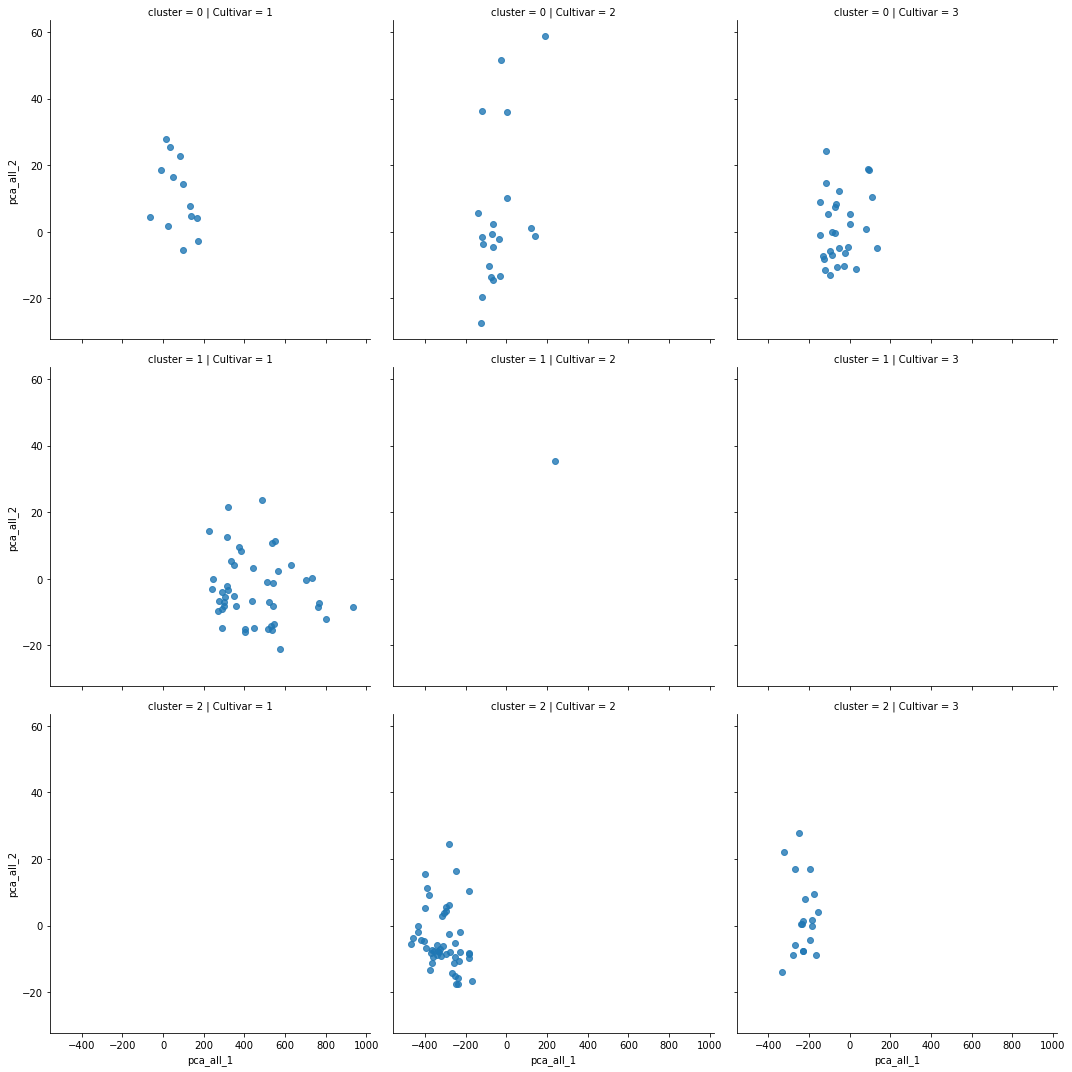

In [13]:
# Compare the groupings by faceting the plot.
with sns.plotting_context(font_scale=5):
    fig = sns.lmplot(x='pca_all_1', y='pca_all_2', data=kmeans_3, row='cluster', col='Cultivar', fit_reg=False)
    
plt.show()

In [14]:
# Print cross-tabulated frequency count
print(pd.crosstab(kmeans_3['cluster'], kmeans_3['Cultivar'], margins=True))

Cultivar   1   2   3  All
cluster                  
0         13  20  29   62
1         46   1   0   47
2          0  50  19   69
All       59  71  48  178


*********************************************
### Hierarchical Clustering

In [15]:
from scipy.cluster import hierarchy

In [16]:
wine = pd.read_csv('../data/wine.csv')
wine = wine.drop('Cultivar', axis=1)

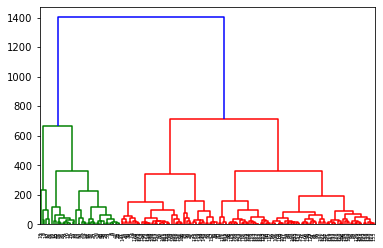

In [17]:
wine_complete = hierarchy.complete(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_complete)
plt.show()

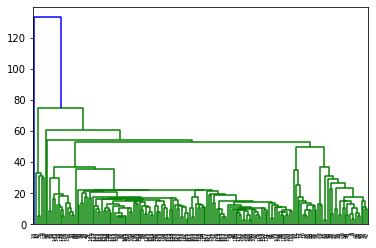

In [18]:
wine_single = hierarchy.single(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_single)
plt.show()

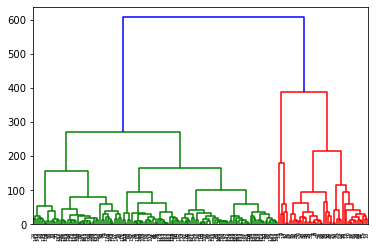

In [19]:
wine_average = hierarchy.average(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_average)
plt.show()

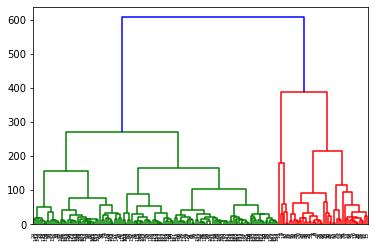

In [20]:
wine_centroid = hierarchy.centroid(wine)
fig = plt.figure()
dn = hierarchy.dendrogram(wine_centroid)
plt.show()